In [1]:
import pandas as pd
import numpy as np
import nltk
import gensim
import re
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import shelve
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import linear_kernel, euclidean_distances
from rake_nltk import Rake
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.cluster import DBSCAN
import itertools  
import gensim

%matplotlib notebook

C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df = pd.read_csv('articles.csv')
wnl = WordNetLemmatizer()
df.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


In [34]:
stopwords = set()
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords.add('make')
stopwords.add('publishes')
stopwords.add('worth')
stopwords.add('called')
stopwords.add('would')
stopwords.add('take')
stopwords.add('going')
stopwords.add('never')
stopwords.add('anyone')
stopwords.add('even')
stopwords.add('could')
stopwords.add('often')
stopwords.add('sarcasm')
stopwords.add('http')
stopwords.add('see')
stopwords.add('ever')
stopwords.add('without')
stopwords.add('let')
stopwords.add('come')
stopwords.add('www')
stopwords.add('along')
stopwords.add('also')
stopwords.add('useful')
stopwords.add('anything')
stopwords.add('instead')
stopwords.add('whole')
stopwords.add('lot')
stopwords.add('want')
stopwords.add('whether')
stopwords.add('also')
stopwords.add('still')
stopwords.add('another')
stopwords.add('came')
stopwords.add('nobody')
stopwords.add('let')
stopwords.add('using')
stopwords.add('prefer')
stopwords.add('oh')
stopwords.add('how')
stopwords.add('however')
stopwords.add('the')
stopwords.add('and')
stopwords.add('were')
stopwords.add('who')
stopwords.add('of')
stopwords.add('yes')
stopwords.add('our')
stopwords.add('now')
stopwords.add('on')
stopwords.add('if')
stopwords.add('of')
stopwords.add('for')
stopwords.add('there')
stopwords.add('became')
stopwords.add('got')
stopwords.add('came')
stopwords.add('along')
stopwords.add('please')
stopwords.add('consider')



In [35]:
def remove_special_characters(df):
    
    df = re.sub(r'[^a-zA-Z]',r' ',df)
    
    return df

df['cleaned_text'] = df['text'].apply(remove_special_characters)

def tokenize(df):
    df = df.split(' ')
    words = []
    
    for word in df:
        
        if word!='':
            words.append(wnl.lemmatize(word.lower()))
            
            
    return words

df['cleaned_tokens'] = df['cleaned_text'].apply(tokenize)
        

In [36]:
df.head()


,author,claps,reading_time,link,title,text,cleaned_text,cleaned_tokens
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",Oh how the headlines blared Chatbots were Th...,"[oh, how, the, headline, blared, chatbots, wer..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...,If you ve ever found yourself looking up the s...,"[if, you, ve, ever, found, yourself, looking, ..."
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...,Machine learning is increasingly moving from h...,"[machine, learning, is, increasingly, moving, ..."
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...,If your understanding of A I and Machine Lear...,"[if, your, understanding, of, a, i, and, machi..."
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,Want to learn about applied Artificial Intelli...,"[want, to, learn, about, applied, artificial, ..."


In [37]:
def extract_rake_keywords(df):
    
    r = Rake()
    
    r.extract_keywords_from_text(df)
    
    return list(r.get_ranked_phrases())

df['rake_keywords'] = df['cleaned_text'].apply(extract_rake_keywords)

In [38]:
df.head()

,author,claps,reading_time,link,title,text,cleaned_text,cleaned_tokens,rake_keywords
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",Oh how the headlines blared Chatbots were Th...,"[oh, how, the, headline, blared, chatbots, wer...",[humanity brands hide behind ticket numbers fe...
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...,If you ve ever found yourself looking up the s...,"[if, you, ve, ever, found, yourself, looking, ...",[story data scientist writer www conordewey co...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...,Machine learning is increasingly moving from h...,"[machine, learning, is, increasingly, moving, ...",[many forms principal component analysis pca s...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...,If your understanding of A I and Machine Lear...,"[if, your, understanding, of, a, i, and, machi...",[story software consultant adjunct professor p...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,Want to learn about applied Artificial Intelli...,"[want, to, learn, about, applied, artificial, ...","[play atari games beating pro players, called ..."


In [39]:
def create_bigrams(df):
    
    words = []
    for keyword in df:
        
        if len(keyword.split(' ')) > 1:
            split_keyword = keyword.split(' ')
            for index in range(len(keyword.split(' '))-1):

                if wnl.lemmatize(split_keyword[index]) not in stopwords and wnl.lemmatize(split_keyword[index + 1]) not in stopwords:

                    words.append(wnl.lemmatize(split_keyword[index]) + '_' + wnl.lemmatize(split_keyword[index + 1]))

                else:

                    continue
        
    return words

df['bigrams'] = df['rake_keywords'].apply(create_bigrams)

In [40]:
df.head()


,author,claps,reading_time,link,title,text,cleaned_text,cleaned_tokens,rake_keywords,bigrams
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",Oh how the headlines blared Chatbots were Th...,"[oh, how, the, headline, blared, chatbots, wer...",[humanity brands hide behind ticket numbers fe...,"[humanity_brand, brand_hide, hide_behind, behi..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...,If you ve ever found yourself looking up the s...,"[if, you, ve, ever, found, yourself, looking, ...",[story data scientist writer www conordewey co...,"[story_data, data_scientist, scientist_writer,..."
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...,Machine learning is increasingly moving from h...,"[machine, learning, is, increasingly, moving, ...",[many forms principal component analysis pca s...,"[many_form, form_principal, principal_componen..."
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...,If your understanding of A I and Machine Lear...,"[if, your, understanding, of, a, i, and, machi...",[story software consultant adjunct professor p...,"[story_software, software_consultant, consulta..."
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,Want to learn about applied Artificial Intelli...,"[want, to, learn, about, applied, artificial, ...","[play atari games beating pro players, called ...","[play_atari, atari_game, game_beating, beating..."


In [41]:
def create_trigrams(df):
    
    words = []
    
    for keyword in df:
        
        if len(keyword.split(' ')) > 2:
            split_keyword = keyword.split(' ')
            for index in range(len(keyword.split(' '))-2):

                if wnl.lemmatize(split_keyword[index]) not in stopwords and wnl.lemmatize(split_keyword[index+1]) not in stopwords and wnl.lemmatize(split_keyword[index+2]) not in stopwords:

                    words.append(wnl.lemmatize(split_keyword[index]) + '_' + wnl.lemmatize(split_keyword[index + 1]) + '_' + wnl.lemmatize(split_keyword[index+2]))

                else:

                    continue

    return words

df['trigrams'] = df['rake_keywords'].apply(create_trigrams)    

In [42]:
df.head()

,author,claps,reading_time,link,title,text,cleaned_text,cleaned_tokens,rake_keywords,bigrams,trigrams
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",Oh how the headlines blared Chatbots were Th...,"[oh, how, the, headline, blared, chatbots, wer...",[humanity brands hide behind ticket numbers fe...,"[humanity_brand, brand_hide, hide_behind, behi...","[humanity_brand_hide, brand_hide_behind, hide_..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...,If you ve ever found yourself looking up the s...,"[if, you, ve, ever, found, yourself, looking, ...",[story data scientist writer www conordewey co...,"[story_data, data_scientist, scientist_writer,...","[story_data_scientist, data_scientist_writer, ..."
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...,Machine learning is increasingly moving from h...,"[machine, learning, is, increasingly, moving, ...",[many forms principal component analysis pca s...,"[many_form, form_principal, principal_componen...","[many_form_principal, form_principal_component..."
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...,If your understanding of A I and Machine Lear...,"[if, your, understanding, of, a, i, and, machi...",[story software consultant adjunct professor p...,"[story_software, software_consultant, consulta...","[story_software_consultant, software_consultan..."
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,Want to learn about applied Artificial Intelli...,"[want, to, learn, about, applied, artificial, ...","[play atari games beating pro players, called ...","[play_atari, atari_game, game_beating, beating...","[play_atari_game, atari_game_beating, game_bea..."


In [43]:
bigram_dist = {}

for article in df['bigrams']:
    
    for bigram in article:
        
        if bigram in bigram_dist.keys():
            
            bigram_dist[bigram] = bigram_dist[bigram] + 1
            
        else:
            
            bigram_dist.update({bigram:1})
            
trigram_dist = {}

for article in df['trigrams']:
    
    for trigram in article:
        
        if trigram in trigram_dist.keys():
            
            trigram_dist[trigram] = trigram_dist[trigram] + 1
            
        else:
            
            trigram_dist.update({trigram:1})
                        

In [44]:
len(bigram_dist.keys())

63633

In [45]:
def filtering_ngrams(trigrams, bigrams, threshold):
    
    for key in list(trigrams.keys()):
        
        if trigrams[key] < threshold:
            
            trigrams.pop(key)
            
    
    for trigram in list(trigrams.keys()):
        
        for bigram in list(bigrams.keys()):
            
            if bigram in trigram:
                
                bigrams.pop(bigram)
                
                
    return bigrams, trigrams


bigram_dist, trigram_dist = filtering_ngrams(trigram_dist, bigram_dist, 5)
            
            

In [47]:
len(bigram_dist.keys())

61839

In [48]:
def create_ngram_articles(df):
    index = 0
    
    words = []
    
    while index < (len(df)-3):
        
        if df[index] + '_' + df[index+1] + '_' + df[index+2] in list(trigram_dist.keys()):
            
            words.append(df[index] + '_' + df[index+1] + '_' + df[index+2])
            index = index + 2
            
        elif df[index] + '_' + df[index+1] in list(bigram_dist.keys()):
            
            words.append(df[index] + '_' + df[index+1])
            index = index + 1
            
        else:
            
            words.append(df[index])
            
        index = index + 1
        
    if index == len(df) - 2:
        
        if df[index] + '_' + df[index+1] in list(bigram_dist.keys()):
            
            words.append(df[index] + '_' + df[index+1])
        else:
            words.append(df[index])
            words.append(df[index+1])
            
    
    return words

df['ngram_article'] = df['cleaned_tokens'].apply(create_ngram_articles)

In [49]:
df.head()

,author,claps,reading_time,link,title,text,cleaned_text,cleaned_tokens,rake_keywords,bigrams,trigrams,ngram_article
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",Oh how the headlines blared Chatbots were Th...,"[oh, how, the, headline, blared, chatbots, wer...",[humanity brands hide behind ticket numbers fe...,"[humanity_brand, brand_hide, hide_behind, behi...","[humanity_brand_hide, brand_hide_behind, hide_...","[oh, how, the, headline_blared, chatbots, were..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...,If you ve ever found yourself looking up the s...,"[if, you, ve, ever, found, yourself, looking, ...",[story data scientist writer www conordewey co...,"[story_data, data_scientist, scientist_writer,...","[story_data_scientist, data_scientist_writer, ...","[if, you, ve, ever, found, yourself, looking, ..."
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...,Machine learning is increasingly moving from h...,"[machine, learning, is, increasingly, moving, ...",[many forms principal component analysis pca s...,"[many_form, form_principal, principal_componen...","[many_form_principal, form_principal_component...","[machine, learning, is, increasingly_moving, f..."
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...,If your understanding of A I and Machine Lear...,"[if, your, understanding, of, a, i, and, machi...",[story software consultant adjunct professor p...,"[story_software, software_consultant, consulta...","[story_software_consultant, software_consultan...","[if, your, understanding, of, a, i, and, machi..."
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,Want to learn about applied Artificial Intelli...,"[want, to, learn, about, applied, artificial, ...","[play atari games beating pro players, called ...","[play_atari, atari_game, game_beating, beating...","[play_atari_game, atari_game_beating, game_bea...","[want, to, learn, about, applied_artificial, i..."


In [2]:
shelf = shelve.open('D:\\')



In [56]:
#shelf['Data'] = df

In [3]:
df = shelf['Data']

In [2]:
df = pd.read_csv('recommendation_system_data.csv')

In [3]:
np.arange(1,10,1
         )

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
df = df.drop_duplicates(subset='title', keep="first")

In [5]:
df['index'] = list(np.arange(0, len(df['title']), 1))

In [6]:
df.set_index('index', inplace = True)

df.drop('Unnamed: 0', inplace = True, axis = 1)

In [7]:
df

,author,claps,reading_time,link,title,text,cleaned_text,cleaned_tokens,rake_keywords,bigrams,trigrams,ngram_article
index,,,,,,,,,,,,
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",Oh how the headlines blared Chatbots were Th...,"['oh', 'how', 'the', 'headline', 'blared', 'ch...",['humanity brands hide behind ticket numbers f...,"['humanity_brand', 'brand_hide', 'hide_behind'...","['humanity_brand_hide', 'brand_hide_behind', '...","['oh', 'how', 'the', 'headline_blared', 'chatb..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...,If you ve ever found yourself looking up the s...,"['if', 'you', 've', 'ever', 'found', 'yourself...",['story data scientist writer www conordewey c...,"['story_data', 'data_scientist', 'scientist_wr...","['story_data_scientist', 'data_scientist_write...","['if', 'you', 've', 'ever', 'found', 'yourself..."
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...,Machine learning is increasingly moving from h...,"['machine', 'learning', 'is', 'increasingly', ...",['many forms principal component analysis pca ...,"['many_form', 'form_principal', 'principal_com...","['many_form_principal', 'form_principal_compon...","['machine', 'learning', 'is', 'increasingly_mo..."
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...,If your understanding of A I and Machine Lear...,"['if', 'your', 'understanding', 'of', 'a', 'i'...",['story software consultant adjunct professor ...,"['story_software', 'software_consultant', 'con...","['story_software_consultant', 'software_consul...","['if', 'your', 'understanding', 'of', 'a', 'i'..."
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,Want to learn about applied Artificial Intelli...,"['want', 'to', 'learn', 'about', 'applied', 'a...","['play atari games beating pro players', 'call...","['play_atari', 'atari_game', 'game_beating', '...","['play_atari_game', 'atari_game_beating', 'gam...","['want', 'to', 'learn', 'about', 'applied_arti..."
5,Irhum Shafkat,2K,15,https://towardsdatascience.com/intuitively-und...,Intuitively Understanding Convolutions for Dee...,The advent of powerful and versatile deep lear...,The advent of powerful and versatile deep lear...,"['the', 'advent', 'of', 'powerful', 'and', 've...",['fairly low level features like edges lines e...,"['fairly_low', 'low_level', 'level_feature', '...","['fairly_low_level', 'low_level_feature', 'lev...","['the', 'advent', 'of', 'powerful', 'and', 've..."
6,Sam Drozdov,2.3K,6,https://uxdesign.cc/an-intro-to-machine-learni...,An intro to Machine Learning for designers – U...,There is an ongoing debate about whether or no...,There is an ongoing debate about whether or no...,"['there', 'is', 'an', 'ongoing', 'debate', 'ab...",['explicitly programmed arthur samuel even tho...,"['explicitly_programmed', 'programmed_arthur',...","['explicitly_programmed_arthur', 'programmed_a...","['there', 'is', 'an', 'ongoing_debate', 'about..."
7,Conor Dewey,252,10,https://towardsdatascience.com/the-big-list-of...,The Big List of DS/ML Interview Resources – To...,Data science interviews certainly aren’t easy....,Data science interviews certainly aren t easy ...,"['data', 'science', 'interview', 'certainly', ...",['story data scientist writer www conordewey c...,"['story_data', 'data_scientist', 'scientist_wr...","['story_data_scientist', 'data_scientist_write...","['data_science_interview', 'certainly', 'aren'..."
8,Abhishek Parbhakar

In [8]:
x1 = df['ngram_article'][0]

In [9]:
#w2v_model.wv.get_vector('natural_language_processing')

In [8]:
def ngram_list(df):
    
    tokens = []
   
    words = df.strip('[]').split(',')
    
    for word in words:
        
        tokens.append(word.strip(' \''))
        
    return tokens

df['ngram_article'] = df['ngram_article'].apply(ngram_list)
        

In [9]:
df

,author,claps,reading_time,link,title,text,cleaned_text,cleaned_tokens,rake_keywords,bigrams,trigrams,ngram_article
index,,,,,,,,,,,,
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",Oh how the headlines blared Chatbots were Th...,"['oh', 'how', 'the', 'headline', 'blared', 'ch...",['humanity brands hide behind ticket numbers f...,"['humanity_brand', 'brand_hide', 'hide_behind'...","['humanity_brand_hide', 'brand_hide_behind', '...","[oh, how, the, headline_blared, chatbots, were..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...,If you ve ever found yourself looking up the s...,"['if', 'you', 've', 'ever', 'found', 'yourself...",['story data scientist writer www conordewey c...,"['story_data', 'data_scientist', 'scientist_wr...","['story_data_scientist', 'data_scientist_write...","[if, you, ve, ever, found, yourself, looking, ..."
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...,Machine learning is increasingly moving from h...,"['machine', 'learning', 'is', 'increasingly', ...",['many forms principal component analysis pca ...,"['many_form', 'form_principal', 'principal_com...","['many_form_principal', 'form_principal_compon...","[machine, learning, is, increasingly_moving, f..."
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...,If your understanding of A I and Machine Lear...,"['if', 'your', 'understanding', 'of', 'a', 'i'...",['story software consultant adjunct professor ...,"['story_software', 'software_consultant', 'con...","['story_software_consultant', 'software_consul...","[if, your, understanding, of, a, i, and, machi..."
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,Want to learn about applied Artificial Intelli...,"['want', 'to', 'learn', 'about', 'applied', 'a...","['play atari games beating pro players', 'call...","['play_atari', 'atari_game', 'game_beating', '...","['play_atari_game', 'atari_game_beating', 'gam...","[want, to, learn, about, applied_artificial, i..."
5,Irhum Shafkat,2K,15,https://towardsdatascience.com/intuitively-und...,Intuitively Understanding Convolutions for Dee...,The advent of powerful and versatile deep lear...,The advent of powerful and versatile deep lear...,"['the', 'advent', 'of', 'powerful', 'and', 've...",['fairly low level features like edges lines e...,"['fairly_low', 'low_level', 'level_feature', '...","['fairly_low_level', 'low_level_feature', 'lev...","[the, advent, of, powerful, and, versatile_dee..."
6,Sam Drozdov,2.3K,6,https://uxdesign.cc/an-intro-to-machine-learni...,An intro to Machine Learning for designers – U...,There is an ongoing debate about whether or no...,There is an ongoing debate about whether or no...,"['there', 'is', 'an', 'ongoing', 'debate', 'ab...",['explicitly programmed arthur samuel even tho...,"['explicitly_programmed', 'programmed_arthur',...","['explicitly_programmed_arthur', 'programmed_a...","[there, is, an, ongoing_debate, about, whether..."
7,Conor Dewey,252,10,https://towardsdatascience.com/the-big-list-of...,The Big List of DS/ML Interview Resources – To...,Data science interviews certainly aren’t easy....,Data science interviews certainly aren t easy ...,"['data', 'science', 'interview', 'certainly', ...",['story data scientist writer www conordewey c...,"['story_data', 'data_scientist', 'scientist_wr...","['story_data_scientist', 'data_scientist_write...","[data_science_interview, certainly, aren, t, e..."
8,Abhishek Parbhakar

In [10]:
def join_text(df):
    
    article = ''
    
    for index in range(len(df)):
        
        if index == 0:
            
            article = article + df[index]
        
        elif index < len(df)-1:
            
            article = article + ' ' + df[index]
            
        elif index == len(df) - 1:
            
            article = article + df[index]
            
            
    return article

df['article_text'] = df['ngram_article'].apply(join_text)
            
        
articles = []

for i in df['article_text']:
    
    articles.append(i)

In [11]:
vec = TfidfVectorizer()

X = vec.fit_transform(articles)

In [12]:
tfidf_X = pd.DataFrame.sparse.from_spmatrix(X)

tfidf_X

,0,1,2,3,4,5,6,7,8,9,...,55325,55326,55327,55328,55329,55330,55331,55332,55333,55334
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0


In [15]:
components = np.arange(100,1000, 100)
eigen_values = []
for component in components:
    
    truncated = TruncatedSVD(n_components = component, random_state = 1)
    X_LSA = pd.DataFrame(truncated.fit_transform(tfidf_X))
    
    
    eigen_values.append(sum(truncated.explained_variance_ratio_))
    
    
    



Text(0, 0.5, 'explained variance ratio')

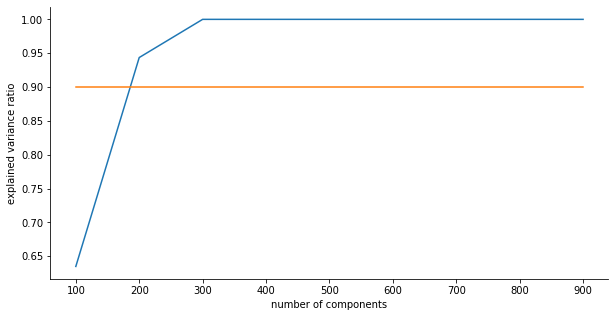

In [16]:
plt.figure(figsize = (10,5))

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.lineplot(components, eigen_values)
sns.lineplot(components, 0.9)
#sns.lineplot(185, [0.1])
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')

In [13]:
truncated = TruncatedSVD(n_components = 200, random_state = 1)
X_LSA = pd.DataFrame(truncated.fit_transform(tfidf_X))

In [14]:
X.shape

(230, 55335)

In [87]:
#df['keywords'] = shelf['keywords']

In [88]:
# unique_words = []

# for keywords in df['keywords']:
    
#     for word in keywords:
        
#         if word not in unique_words:
            
#             unique_words.append(word)
            
            


In [15]:
X_LSA.shape

X_LSA = pd.DataFrame(X_LSA)

In [16]:
n_max = 40
n_clusters = np.arange(2,n_max,1)
inertia = []

for n_cluster in n_clusters:
    
    kmeans = KMeans(n_clusters = n_cluster, random_state = 2).fit(X_LSA)
    inertia.append(kmeans.inertia_)
    

(0, 40)

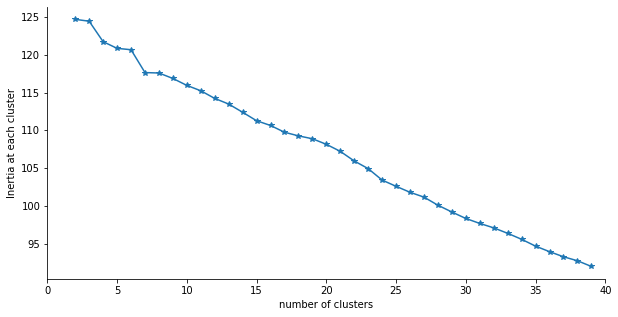

In [17]:
%matplotlib inline
plt.figure(figsize = (10,5))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(range(2,len(inertia)+2),inertia,'-*')
plt.xlabel('number of clusters')
plt.ylabel('Inertia at each cluster')
#plt.ylim(0,200)
plt.xlim(0,n_max)

In [52]:
def get_similar_papers(similarity_matrix, top_articles):

    for article_id in similarity_matrix['text'].index[:top_articles]:

        print(similarity_matrix['title'][article_id])
        print('---> Summarized Content for word count:,"\n"' )

        
        summarized_content = gensim.summarization.summarize(similarity_matrix['text'][article_id], word_count = 100)
        print(summarized_content)
        print('\n')
        print('---> Summarized Content for ratio:,"\n"' )
        summarized_content = gensim.summarization.summarize(similarity_matrix['text'][article_id], ratio = 0.05)
        print(summarized_content)
        print('\n\n\n\n\n')
        


In [53]:
for i in range(1, len(inertia)):
    
    if abs(1 - (inertia[i]/inertia[i-1]))<0.001:
        print(i)
        
    

6


In [54]:
kmeans = KMeans(n_clusters = 6, random_state = 2).fit(X_LSA)

df['class_labels'] = list(kmeans.labels_)
print(kmeans)
kmeans.cluster_centers_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)


array([[ 6.33720017e-01, -1.27530491e-01,  1.27689032e-02, ...,
        -2.06764485e-03,  3.09647450e-03,  1.06032961e-02],
       [ 6.72511014e-01,  1.05603071e-01, -8.67573027e-02, ...,
        -3.44558861e-02, -1.52310324e-02,  6.68272665e-03],
       [ 6.98074815e-01,  6.78819090e-02,  2.58323622e-02, ...,
         7.91793495e-04,  1.46720441e-03, -1.35548001e-03],
       [ 4.09060117e-01,  3.65587707e-02, -3.75973362e-02, ...,
         1.73744596e-04,  8.99647053e-04,  1.96602172e-03],
       [ 7.03665229e-01, -1.39680072e-01, -3.20059572e-02, ...,
        -3.80457272e-04, -4.01578490e-03,  1.22422288e-03],
       [ 3.96125613e-01,  1.53729922e-01,  1.47780917e-02, ...,
        -4.77711555e-03,  5.17114715e-03, -2.44714117e-03]])

In [31]:
def get_articles(article_id):
    
    distances = []
    cluster = 0
    min_distance = 1000
    for centroid in list(kmeans.cluster_centers_):
        
        distances.append(euclidean_distances([X_LSA.iloc[article_id]], [centroid])[0][0])
        
        if euclidean_distances([X_LSA.iloc[article_id]], [centroid])[0][0] < min_distance:
            
            min_distance = euclidean_distances([X_LSA.iloc[article_id]], [centroid])[0][0]
            
            index = cluster
            
        cluster = cluster + 1
        
        
    df['kmeans_labels'] = kmeans.labels_
    
    kmeans_df = df[df['kmeans_labels'] == index]
    
    article_distances = []
    
    for i in kmeans_df.index:
        
        article_distances.append(euclidean_distances([X_LSA.iloc[article_id]], [X_LSA.iloc[i]])[0][0])
        
    kmeans_df['distance'] = article_distances
    
    kmeans_df.sort_values(by = 'distance', inplace = True)
    
    
    return kmeans_df[['title', 'distance', 'text']][:16]
    
x2 = get_articles(4)
print(x2)

                                                   title  distance  \
index                                                                
4      Reinforcement Learning from scratch – Insight ...  0.000000   
27       Formalizing indirect normativity – AI Alignment  0.587332   
58     Deep Learning the Stock Market – Tal Perry – M...  0.594893   
24     Netflix Recommendations: Beyond the 5 stars (P...  0.659028   
115    Explained Simply: How an AI program mastered t...  0.669466   
14     Machine Learning is Fun! Part 3: Deep Learning...  0.687387   
142    In defense of skepticism about deep learning –...  0.699804   
136    Ultimate Guide to Leveraging NLP & Machine Lea...  0.714851   
114    What worries me about AI – François Chollet –...  0.716379   
20     Artificial Intelligence — The Revolution Hasn’...  0.722866   
176      The future of work – Oxford University – Medium  0.723385   
122    Beethoven, Picasso, and Artificial Intelligenc...  0.724229   
70     How to solve 

C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [57]:
x2

,title,distance,text
index,,,
4,Reinforcement Learning from scratch – Insight ...,0.000000,Want to learn about applied Artificial Intelli...
27,Formalizing indirect normativity – AI Alignment,0.587332,This post outlines a formalization of what Nic...
58,Deep Learning the Stock Market – Tal Perry – M...,0.594893,Update 25.1.17 — Took me a while but here is a...
24,Netflix Recommendations: Beyond the 5 stars (P...,0.659028,by Xavier Amatriain and Justin Basilico (Perso...
115,Explained Simply: How an AI program mastered t...,0.669466,"This is about AlphaGo, Google DeepMind’s Go pl..."
14,Machine Learning is Fun! Part 3: Deep Learning...,0.687387,Update: This article is part of a series. Chec...
142,In defense of skepticism about deep learning –...,0.699804,In a recent appraisal of deep learning (Marcus...
136,Ultimate Guide to Leveraging NLP & Machine Lea...,0.714851,Code Snippets and Github Included\nOver the pa...
114,What worries me about AI – François Chollet –...,0.716379,Disclaimer: These are my own personal views. I...


In [55]:
get_similar_papers(x2, top_articles = 5)

Reinforcement Learning from scratch – Insight Data
---> Summarized Content for word count:,"
"
The crux of the problem is to balance exploration, which helps us learn about which states are good, and exploitation, where we now use what we know to pick the best slot machine.
The previous methods were using neural networks to approximate our value estimates by mapping from a discrete number of states and actions to a value.
In Vanilla Policy Gradient, we still use Monte Carlo Estimates, but we learn our policy directly through a loss function that increases the probability of choosing rewarding actions.
In practice, many state of the art RL methods require learning both a policy and value estimates.


---> Summarized Content for ratio:,"
"
The crux of the problem is to balance exploration, which helps us learn about which states are good, and exploitation, where we now use what we know to pick the best slot machine.
This means we need to learn a Q function that depends not only on the ac

In [21]:
similarity = []
avg = []
for index in df.index:
    x2 = get_articles(index)
    for i in x2.index[1:-1]:
        if i!=len(df)-1:
            similarity.append(cosine_similarity([X_LSA.iloc[i]], [X_LSA.iloc[i+1]]))

    avg.append(sum(similarity)/len(similarity))
sum(avg)/len(avg)

C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

array([[0.55590687]])

In [22]:
for i in x2['distance']:
    
    print(i)

0.0
0.642408007803198
0.6551305337316172
0.6723889697035279
0.6875083874222252
0.6939106091008015
0.7037285704651444
0.7198859180648567
0.7376953694971277
0.7404258263010779
0.7459156651885741
0.756989336097117
0.7874125816737739
0.7903368473408734
0.7915326265736213
0.7926085886731076


In [60]:
def get_similar_articles_cosine_similarity(article_vector, X, df,index):
    
    similar = pd.DataFrame({'index':[], 'similarity':[], 'title':[],'link':[], 'text':[]})
    
    similar['similarity'] = cosine_similarity(X,X)[index]
    similar['index'] = list(df.index)
    similar['title'] = list(df['title'])
    similar['link'] = list(df['link'])
    similar['text'] = list(df['text'])
    similar = similar[similar['index']!=index]
    
    
    return similar.sort_values(by = 'similarity', ascending = False)[['similarity', 'index', 'title','link','text']][:15]


In [61]:
x1 = get_similar_articles_cosine_similarity(X_LSA.iloc[4].data, X_LSA, df, 4)

C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [62]:
x1

,similarity,index,title,link,text
217,0.851106,217,Write an AI to win at Pong from scratch with R...,https://medium.com/@dhruvp/how-to-write-a-neur...,There’s a huge difference between reading abou...
27,0.797126,27,Formalizing indirect normativity – AI Alignment,https://ai-alignment.com/a-formalization-of-in...,This post outlines a formalization of what Nic...
58,0.793118,58,Deep Learning the Stock Market – Tal Perry – M...,https://medium.com/@TalPerry/deep-learning-the...,Update 25.1.17 — Took me a while but here is a...
212,0.789759,212,Rohan & Lenny #1: Neural Networks & The Backpr...,https://ayearofai.com/rohan-lenny-1-neural-net...,"In Rohan’s last post, he talked about evaluati..."
55,0.759606,55,Simple Reinforcement Learning with Tensorflow ...,https://medium.com/emergent-future/simple-rein...,For this tutorial in my Reinforcement Learning...
24,0.746968,24,Netflix Recommendations: Beyond the 5 stars (P...,https://medium.com/netflix-techblog/netflix-re...,by Xavier Amatriain and Justin Basilico (Perso...
182,0.742736,182,Deep Learning Achievements Over the Past Year ...,https://blog.statsbot.co/deep-learning-achieve...,"At Statsbot, we’re constantly reviewing the de..."
115,0.739420,115,Explained Simply: How an AI program mastered t...,https://medium.freecodecamp.org/explained-simp...,"This is about AlphaGo, Google DeepMind’s Go pl..."
218,0.726756,218,Traffic Sign Recognition with TensorFlow – Wal...,https://medium.com/@waleedka/traffic-sign-reco...,This is part 1 of a series about building a de...
14,0.724462,14,Machine Learning is Fun! Part 3: Deep Learning...,https://medium.com/@ageitgey/machine-learning-...,Update: This article is part of a series. Chec...


In [56]:
get_similar_papers(x1, top_articles = 15)

Write an AI to win at Pong from scratch with Reinforcement Learning
---> Summarized Content for word count:,"
"
We’ll need to collect a bunch of observations and intermediate values across the episode and use those to compute the gradient at the end based on the result.
Now that we have obtained a probability of going up, we need to now record the results for later learning and choose an action to tell our AI to implement:
After this, we’re going to finally use backpropagation to compute the gradient (i.e. the direction we need to move our weights to improve).
After we have finished batch_size episodes, we finally update our weights for our Neural Network and implement our learnings.


---> Summarized Content for ratio:,"
"
In this post, you’ll implement a Neural Network for Reinforcement Learning and see it learn more and more as it finally becomes good enough to beat the computer in Pong!
We’ll need to collect a bunch of observations and intermediate values across the episode and use

In [115]:
similarity = []
avg = []
for index in df.index:
    x2 = get_similar_articles_cosine_similarity(X_LSA.iloc[index].data, X_LSA, df, index)
    for i in x2.index[0:14]:
        if i!=len(df)-1:
            similarity.append(cosine_similarity([X_LSA.iloc[i]], [X_LSA.iloc[i+1]]))

    avg.append(sum(similarity)/len(similarity))
sum(avg)/len(avg)

C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.data is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.data is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.data is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.data is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.data is deprecated and will be rem

array([[0.60716473]])

In [129]:
df['title'][137]

'Simple Reinforcement Learning with Tensorflow Part 8: Asynchronous Actor-Critic Agents (A3C)'

In [130]:
df['text'][4]

'Want to learn about applied Artificial Intelligence from leading practitioners in Silicon Valley, New York, or Toronto? Learn more about the Insight Artificial Intelligence Fellows Program.\nAre you a company working in AI and would like to get involved in the Insight AI Fellows Program? Feel free to get in touch.\nRecently, I gave a talk at the O’Reilly AI conference in Beijing about some of the interesting lessons we’ve learned in the world of NLP. While there, I was lucky enough to attend a tutorial on Deep Reinforcement Learning (Deep RL) from scratch by Unity Technologies. I thought that the session, led by Arthur Juliani, was extremely informative and wanted to share some big takeaways below.\nIn our conversations with companies, we’ve seen a rise of interesting Deep RL applications, tools and results. In parallel, the inner workings and applications of Deep RL, such as AlphaGo pictured above, can often seem esoteric and hard to understand. In this post, I will give an overview 

In [40]:
neigh = KNeighborsClassifier(n_neighbors=2)
nbrs = neigh.fit(tfidf_X, list(df['class_labels']))
distances, indices = nbrs.kneighbors(tfidf_X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]


Text(0.5, 0, 'Articles')

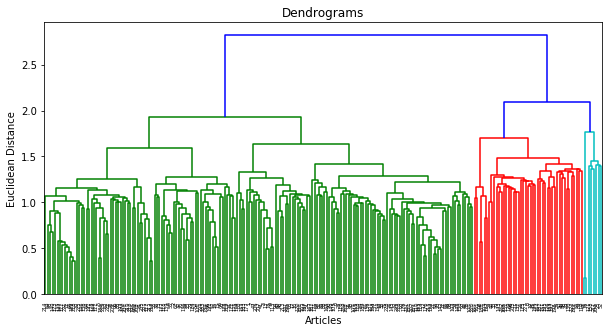

In [41]:
import scipy.cluster.hierarchy as shc
%matplotlib inline
plt.figure(figsize=(10, 5))  
plt.title("Dendrograms")  
plt.plot(len(X_LSA[0]), 2.6)
dend = shc.dendrogram(shc.linkage(X_LSA, method='ward'))
plt.ylabel('Euclidean Distance')
plt.xlabel('Articles')


In [61]:
db = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage = 'ward').fit(X_LSA)

In [62]:
print(db)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')


In [63]:
clusters

NameError: name 'clusters' is not defined

In [64]:
db.children_

array([[ 71,  74],
       [212, 217],
       [182, 218],
       [  5, 186],
       [ 66, 232],
       [ 12, 176],
       [ 27,  58],
       [ 72, 234],
       [ 20, 142],
       [ 13,  18],
       [  9, 115],
       [221, 237],
       [ 14,  15],
       [236, 238],
       [112, 241],
       [114, 235],
       [ 98, 188],
       [147, 244],
       [135, 247],
       [ 24,  25],
       [122, 243],
       [117, 231],
       [ 57, 242],
       [215, 250],
       [ 62, 222],
       [  4,  55],
       [ 43, 140],
       [245, 253],
       [ 70, 136],
       [239, 240],
       [ 69, 256],
       [139, 255],
       [155, 257],
       [107, 169],
       [ 81, 205],
       [ 29, 124],
       [192, 252],
       [229, 254],
       [ 36,  75],
       [118, 261],
       [201, 251],
       [249, 265],
       [104, 127],
       [233, 267],
       [172, 175],
       [  3, 259],
       [110, 262],
       [ 46, 213],
       [ 16, 268],
       [223, 226],
       [137, 269],
       [ 32, 279],
       [258,

In [65]:
ii = itertools.count(X_LSA.shape[0])
clusters = [{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in db.children_]

import copy
n_points = X_LSA.shape[0]
members = {i:[i] for i in range(n_points)}
for cluster in clusters:
    node_id = cluster["node_id"]
    members[node_id] = copy.deepcopy(members[cluster["left"]])
    members[node_id].extend(copy.deepcopy(members[cluster["right"]]))

on_split = {c["node_id"]: [c["left"], c["right"]] for c in clusters}
up_merge = {c["left"]: {"into": c["node_id"], "with": c["right"]} for c in clusters}
up_merge.update({c["right"]: {"into": c["node_id"], "with": c["left"]} for c in clusters})

In [66]:
clusters = pd.DataFrame(clusters)

In [71]:
def get_(article_id):
   
    if len(clusters[clusters['left'] == article_id])!=0:
        
        index = clusters[clusters['left'] == article_id].index[0]
        
        if clusters['right'][index] < 230:
        
            return int(clusters['right'][index])

    
        elif clusters['right'][index] > 229:

            return [int(get_(clusters['node_id'][index]))]
        
    else:
        
        index = clusters[clusters['right'] == article_id].index[0]
        
        if clusters['left'][index] < 230:
        
            return (int(clusters['left'][index]))
    

        elif clusters['left'][index] > 230:

            return [get_(clusters['node_id'][index])]


        


def get_children(article_id):

    for i in clusters.index:
        
        if clusters['right'][i] == article_id:
            
            if clusters['left'][i] < 230:
                
                return int(clusters['left'][i])
            
            elif clusters['left'][i] > 229:
                
                return get_(clusters['node_id'][i])
            
        elif clusters['left'][i] == article_id:
            
            if clusters['right'][i] < 230:
                
                return int(clusters['right'][i])
            
            elif clusters['right'][i] > 229:
                
                return get_(clusters['node_id'][i])

get_children(4)

55

In [74]:
df['title'][55]

'Simple Reinforcement Learning with Tensorflow Part 0: Q-Learning with Tables and Neural Networks'

In [97]:
knearest = KNeighborsClassifier(n_neighbors = 2)
knearest.fit(x_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [99]:
knearest.kneighbors([X_LSA.iloc[11]])

(array([[2.15822672e-15, 2.18784904e-15]]), array([[27, 44]], dtype=int64))

In [101]:
df['title'][]

'Machine Learning Exercises In Python, Part 1 – John Wittenauer – Medium'

In [122]:
def claps_to_int(df):
    
    if 'K' in df:
        
        if '.' in df:
            
            return int(df.split('.')[0])*1000 + int(df.split('.')[1][0])*100
        
        else:
            
            return int(df.split('.')[0][0])*1000
    
    else:
        
        return int(df)
    
df['claps_in_num'] = df['claps'].apply(claps_to_int)
    

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 16 columns):
author            230 non-null object
claps             230 non-null object
reading_time      230 non-null int64
link              230 non-null object
title             230 non-null object
text              230 non-null object
cleaned_text      230 non-null object
cleaned_tokens    230 non-null object
rake_keywords     230 non-null object
bigrams           230 non-null object
trigrams          230 non-null object
ngram_article     230 non-null object
article_text      230 non-null object
kmeans_labels     230 non-null int32
class_labels      230 non-null int64
claps_in_num      230 non-null int64
dtypes: int32(1), int64(3), object(12)
memory usage: 39.6+ KB


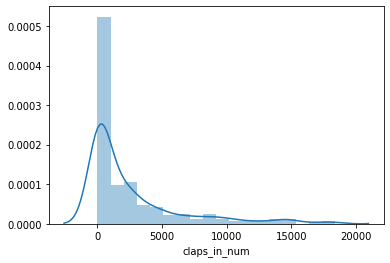

In [124]:
sns.distplot(df['claps_in_num'])

In [125]:
def article_length(df):
    
    return len(df)

df['article_'] = df['ngram_article'].apply(article_length)

Text(0.5, 1.0, 'User preference analysis')

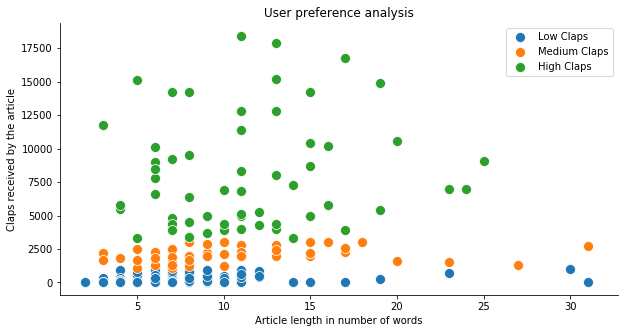

In [264]:
%matplotlib inline

def label_claps(df):
    
    if df <1001:
        return 0
    elif df>1000 and df < 3001:
        return 1
    elif df>3000:
        return 2

df['claps_label'] = df['claps_in_num'].apply(label_claps)
plt.figure(figsize = (10,5))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.scatterplot(df[df['claps_label']==0]['reading_time'],df[df['claps_label']==0]['claps_in_num'], s = 100)

sns.scatterplot(df[df['claps_label']==1]['reading_time'],df[df['claps_label']==1]['claps_in_num'], s = 100)

sns.scatterplot(df[df['claps_label']==2]['reading_time'],df[df['claps_label']==2]['claps_in_num'], s = 100)

plt.legend(['Low Claps','Medium Claps','High Claps'])

plt.xlabel('Article length in number of words')
plt.ylabel('Claps received by the article')
plt.title('User preference analysis')


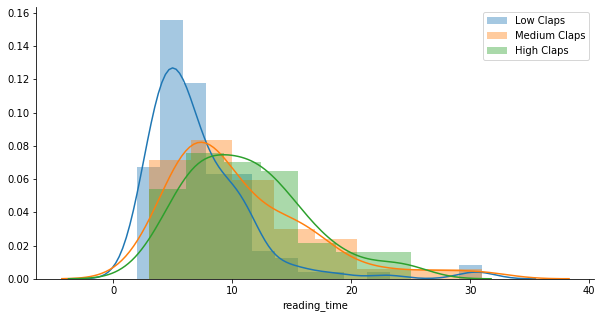

In [265]:
plt.figure(figsize = (10,5))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.distplot(df[df['claps_label']==0]['reading_time'])

sns.distplot(df[df['claps_label']==1]['reading_time'])

sns.distplot(df[df['claps_label']==2]['reading_time'])

plt.legend(['Low Claps','Medium Claps','High Claps'])


Text(0.5, 0.98, 'User Preference Analysis')

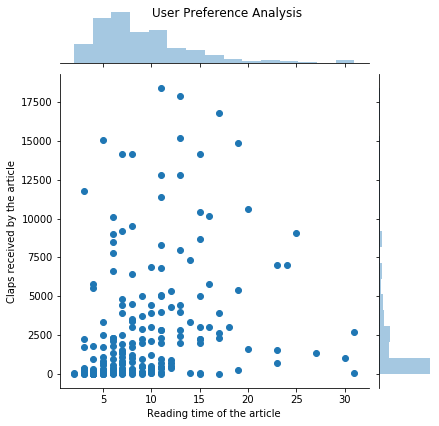

In [174]:
ax = sns.jointplot(df['reading_time'],df['claps_in_num']).set_axis_labels('Reading time of the article', 'Claps received by the article')
ax.fig.suptitle('User Preference Analysis')



In [72]:
truncated.singular_values_

array([12.30073493,  2.27910862,  2.06646641,  2.02310233,  1.87036377,
        1.73115914,  1.6831191 ,  1.62013281,  1.55940844,  1.5187135 ,
        1.49664044,  1.4457245 ,  1.39276957,  1.37598008,  1.33491533,
        1.32785382,  1.31167356,  1.29698988,  1.27169393,  1.26114622,
        1.24608896,  1.23657412,  1.21037839,  1.19505933,  1.19191635,
        1.1748669 ,  1.16682185,  1.15628192,  1.14868429,  1.13786293,
        1.12917687,  1.12176977,  1.10662363,  1.09474162,  1.09153437,
        1.08306186,  1.06905901,  1.05572943,  1.05315676,  1.05045101,
        1.04202052,  1.03985804,  1.03729179,  1.02285632,  1.01922669,
        1.01097034,  1.00641462,  1.00239258,  0.99638644,  0.98862625,
        0.98712339,  0.97991242,  0.97592905,  0.97546569,  0.97198405,
        0.96637893,  0.9601946 ,  0.95632883,  0.95467684,  0.94964263,
        0.94492123,  0.93770852,  0.93169456,  0.93096436,  0.92405873,
        0.92109617,  0.92045401,  0.91269534,  0.90973944,  0.90

In [88]:
components = np.arange(100,1000, 100)
eigen_values = []
for component in components:
    
    truncated = TruncatedSVD(n_components = component)
    X_LSA = pd.DataFrame(truncated.fit_transform(X))
    
    
    eigen_values.append(sum(truncated.explained_variance_ratio_))
    
    
    

sns.lineplot(components, eigen_values)

In [87]:
sum(truncated.explained_variance_ratio_)

0.9999999999999993

In [53]:
print(sum(tfidf_X.var())/len(tfidf_X.columns))

1.0375464988097305e-05


In [63]:
X_LSA.iloc[24]

0      7.590518e-01
1     -1.251628e-02
2     -9.572119e-02
3     -1.434212e-01
4      2.492934e-02
           ...     
295   -6.396396e-33
296    2.984985e-32
297   -3.704579e-32
298    6.822822e-32
299    1.066066e-33
Name: 24, Length: 300, dtype: float64

In [34]:
len(df[df['class_labels']==2])

5

In [59]:
x_train.shape

(252, 300)

In [61]:
type(x_train)

pandas.core.frame.DataFrame

In [111]:
X_LSA.shape

(337, 300)

In [34]:
truncated_analysis = TruncatedSVD(n_components = 2)
Data_ = pd.DataFrame(truncated_analysis.fit_transform(tfidf_X))

In [35]:
Data_['kmeans_labels'] = kmeans.labels_
Data_['agglomerative_labels'] = db.labels_

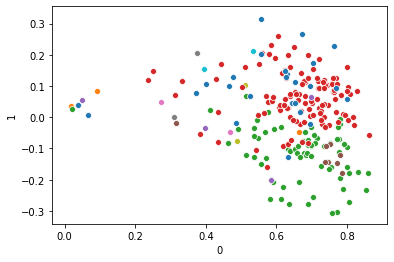

In [36]:
%matplotlib inline

for i in range(23):
    
    x_ = Data_[Data_['kmeans_labels'] == i]
    
    sns.scatterplot(x_[0],x_[1])

C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


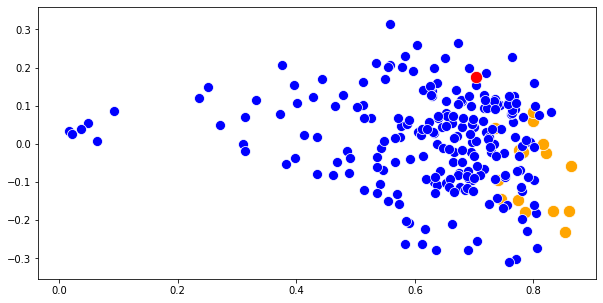

In [75]:
x1 = get_similar_articles_cosine_similarity(X_LSA.iloc[4].data, X_LSA, df, 4)['Index']

plt.figure(figsize = (10,5))
for i in x1:
    
    sns.scatterplot([Data_[0][i]], [Data_[1][i]], s = 150, color = 'orange')

for i in Data_.index:
    
    if i not in x1:
        
        sns.scatterplot([Data_[0][i]],[Data_[1][i]], s = 100, color = 'blue')
    
sns.scatterplot([Data_[0][3]], [Data_[1][3]], s = 150, color = 'red')

C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


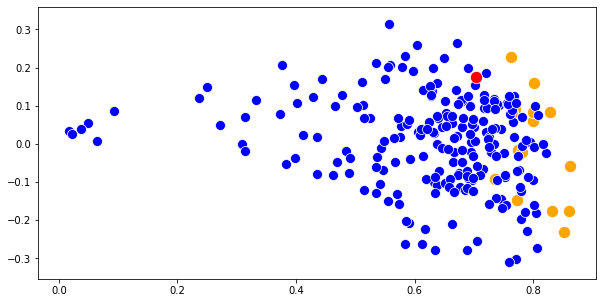

In [76]:
x1 = get_similar_articles_cosine_similarity(X_LSA.iloc[3].data, X_LSA, df, 3)['Index']

plt.figure(figsize = (10,5))
for i in x1:
    
    sns.scatterplot([Data_[0][i]], [Data_[1][i]], s = 150, color = 'orange')

for i in Data_.index:
    
    if i not in x1:
        
        sns.scatterplot([Data_[0][i]],[Data_[1][i]], s = 100, color = 'blue')
    
sns.scatterplot([Data_[0][3]], [Data_[1][3]], s = 150, color = 'red')

C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


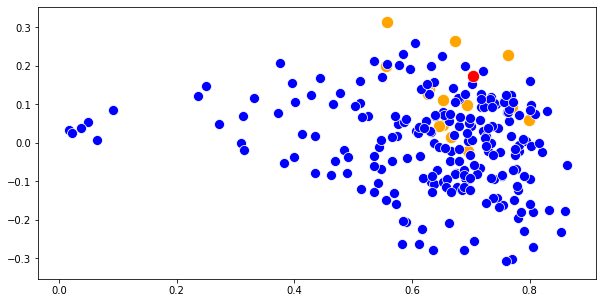

In [85]:
x1 = get_articles(3)

plt.figure(figsize = (10,5))
for i in x1.index:
    
    sns.scatterplot([Data_[0][i]], [Data_[1][i]], s = 150, color = 'orange')

for i in Data_.index:
    
    if i not in x1.index:
        
        sns.scatterplot([Data_[0][i]],[Data_[1][i]], s = 100, color = 'blue')
    
sns.scatterplot([Data_[0][3]], [Data_[1][3]], s = 150, color = 'red')

In [88]:
count_vec = CountVectorizer()

Data_Count = count_vec.fit_transform(articles)

In [93]:
Data_Count = pd.DataFrame.sparse.from_spmatrix(Data_Count)

Data_Count

,0,1,2,3,4,5,6,7,8,9,...,55325,55326,55327,55328,55329,55330,55331,55332,55333,55334
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


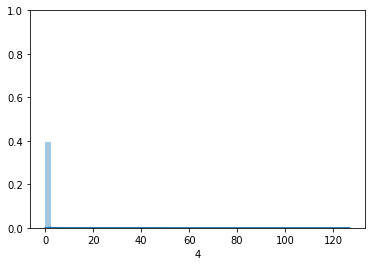

In [105]:
%matplotlib inline
ax = plt.gca()

plt.ylim([-0.1, 1])
sns.distplot(Data_Count.iloc[])

In [120]:
vec.get_feature_names()[list(tfidf_X.iloc[24]).index(max(tfidf_X.iloc[24]))]

'the'

In [30]:
df

,author,claps,reading_time,link,title,text,cleaned_text,cleaned_tokens,rake_keywords,bigrams,trigrams,ngram_article,article_text,class_labels,kmeans_labels
index,,,,,,,,,,,,,,,
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",Oh how the headlines blared Chatbots were Th...,"['oh', 'how', 'the', 'headline', 'blared', 'ch...",['humanity brands hide behind ticket numbers f...,"['humanity_brand', 'brand_hide', 'hide_behind'...","['humanity_brand_hide', 'brand_hide_behind', '...","[oh, how, the, headline_blared, chatbots, were...",oh how the headline_blared chatbots were the n...,2,2
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...,If you ve ever found yourself looking up the s...,"['if', 'you', 've', 'ever', 'found', 'yourself...",['story data scientist writer www conordewey c...,"['story_data', 'data_scientist', 'scientist_wr...","['story_data_scientist', 'data_scientist_write...","[if, you, ve, ever, found, yourself, looking, ...",if you ve ever found yourself looking up the s...,2,2
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...,Machine learning is increasingly moving from h...,"['machine', 'learning', 'is', 'increasingly', ...",['many forms principal component analysis pca ...,"['many_form', 'form_principal', 'principal_com...","['many_form_principal', 'form_principal_compon...","[machine, learning, is, increasingly_moving, f...",machine learning is increasingly_moving from h...,4,4
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...,If your understanding of A I and Machine Lear...,"['if', 'your', 'understanding', 'of', 'a', 'i'...",['story software consultant adjunct professor ...,"['story_software', 'software_consultant', 'con...","['story_software_consultant', 'software_consul...","[if, your, understanding, of, a, i, and, machi...",if your understanding of a i and machine learn...,2,2
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,Want to learn about applied Artificial Intelli...,"['want', 'to', 'learn', 'about', 'applied', 'a...","['play atari games beating pro players', 'call...","['play_atari', 'atari_game', 'game_beating', '...","['play_atari_game', 'atari_game_beating', 'gam...","[want, to, learn, about, applied_artificial, i...",want to learn about applied_artificial intelli...,2,2
5,Irhum Shafkat,2K,15,https://towardsdatascience.com/intuitively-und...,Intuitively Understanding Convolutions for Dee...,The advent of powerful and versatile deep lear...,The advent of powerful and versatile deep lear...,"['the', 'advent', 'of', 'powerful', 'and', 've...",['fairly low level features like edges lines e...,"['fairly_low', 'low_level', 'level_feature', '...","['fairly_low_level', 'low_level_feature', 'lev...","[the, advent, of, powerful, and, versatile_dee...",the advent of powerful and versatile_deep lear...,4,4
6,Sam Drozdov,2.3K,6,https://uxdesign.cc/an-intro-to-machine-learni...,An intro to Machine Learning for designers – U...,There is an ongoing debate about whether or no...,There is an ongoing debate about whether or no...,"['there', 'is', 'an', 'ongoing', 'debate', 'ab...",['explicitly programmed arthur samuel even tho...,"['explicitly_programmed', 'programmed_arthur',...","['explicitly_programmed_arthur', 'programmed_a...","[there, is, an, ongoing_debate, about, whether...",there is an ongoing_debate about whether or no...,2,2
7,Conor Dewey,252,10,https://towardsdatascience.com/the-big-list-of...,The Big